In [ ]:
# 0 installs

In [4]:
#!pip install numba
#!pip install xarray
#!pip install "dask[distributed]" --upgrade    # or pip install
#!pip install cerberus
#!python3 --version
#!pip install astroviper

#!pip install toolviper
#!pip install xarray-datatree
#!pip install python-casacore 
#!pip install casatools
#!pip install matplotlib
#!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [ipywidgets]━━━━━━━ 2/3 [ipywidgets]


In [ ]:
# 1 imports

In [1]:

from astroviper.core.imaging import calculate_imaging_weights
##
##Configure dask for parallel operations
import dask
dask.config.set(scheduler="synchronous")

from toolviper.dask.client import local_client
viper_client = local_client(cores=6, memory_limit="8GB")
viper_client

[2025-09-30 11:21:17,272]     INFO    viperlog:  Module path: /media/ben/home/ben/Documents/Grad Stuff/MM data/Image Cleaning/toolviper 
[2025-09-30 11:21:17,276]  WARNING    viperlog:  It is recommended that the local cache directory be set using the dask_local_dir parameter. 
[2025-09-30 11:21:18,084]     INFO    viperlog:  Client <MenrvaClient: 'tcp://127.0.0.1:42987' processes=6 threads=6, memory=44.70 GiB> 


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 6
Total threads: 6,Total memory: 44.70 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42987,Workers: 6
Dashboard: http://127.0.0.1:8787/status,Total threads: 6
Started: Just now,Total memory: 44.70 GiB
Comm: tcp://127.0.0.1:44057,Total threads: 1
Dashboard: http://127.0.0.1:37053/status,Memory: 7.45 GiB
Nanny: tcp://127.0.0.1:44557,


In [ ]:
# 2 examine example data

In [2]:
#from toolviper.utils.data import download

#download(file="Antennae_North.cal.lsrk.ps.zarr")

In [3]:
# Get antenna positions
from xradio.measurement_set import open_processing_set
import pandas as pd
pd.options.display.max_colwidth = 100

intents = ["OBSERVE_TARGET#ON_SOURCE"]
ps_store = "Antennae_North.cal.lsrk.ps.zarr"
ps = open_processing_set(ps_store, intents=intents)
ps.xr_ps.summary()

,name,intents,shape,polarization,scan_name,spw_name,spw_intent,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,Antennae_North.cal.lsrk_00,[OBSERVE_TARGET#ON_SOURCE],"(20, 45, 166, 2)","[XX, YY]","[13, 17, 25, 9]",spw_0,UNSPECIFIED,[NGC4038 - Antennae North_1],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m51.90s, -18d51m49.94s]",3.430183e+11,3.448715e+11
1,Antennae_North.cal.lsrk_01,[OBSERVE_TARGET#ON_SOURCE],"(20, 45, 166, 2)","[XX, YY]","[13, 17, 25, 9]",spw_0,UNSPECIFIED,[NGC4038 - Antennae North_2],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m52.43s, -18d51m49.94s]",3.430183e+11,3.448715e+11
2,Antennae_North.cal.lsrk_02,[OBSERVE_TARGET#ON_SOURCE],"(20, 45, 166, 2)","[XX, YY]","[13, 21, 25, 9]",spw_0,UNSPECIFIED,[NGC4038 - Antennae North_3],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m52.96s, -18d51m49.94s]",3.430183e+11,3.448715e+11
3,Antennae_North.cal.lsrk_03,[OBSERVE_TARGET#ON_SOURCE],"(20, 45, 166, 2)","[XX, YY]","[13, 21, 25, 9]",spw_0,UNSPECIFIED,[NGC4038 - Antennae North_4],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m53.49s, -18d51m49.94s]",3.430183e+11,3.448715e+11
4,Antennae_North.cal.lsrk_04,[OBSERVE_TARGET#ON_SOURCE],"(20, 45, 166, 2)","[XX, YY]","[13, 21, 25, 9]",spw_0,UNSPECIFIED,[NGC4038 - Antennae North_5],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m54.01s, -18d51m49.94s]",3.430183e+11,3.448715e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Antennae_North.cal.lsrk_87,"[OBSERVE_TARGET#ON_SOURCE, CALIBRATE_WVR#ON_SOURCE]","(15, 77, 166, 2)","[XX, YY]","[52, 56, 64]",spw_0,UNSPECIFIED,[NGC4038 - Antennae North_19],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m51.90s, -18d52m15.90s]",3.430183e+11,3.448715e+11
88,Antennae_North.cal.lsrk_88,"[OBSERVE_TARGET#ON_SOURCE, CALIBRATE_WVR#ON_SOURCE]","(15, 77, 166, 2)","[XX, YY]","[52, 56, 64]",spw_0,UNSPECIFIED,[NGC4038 - Antennae North_20],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m52.43s, -18d52m15.90s]",3.430183e+11,3.448715e+11
89,Antennae_North.cal.lsrk_89,"[OBSERVE_TARGET#ON_SOURCE, CALIBRATE_WVR#ON_SOURCE]","(15, 77, 166, 2)","[XX, YY]","[52, 56, 64]",spw_0,UNSPECIFIED,[NGC4038 - Antennae North_21],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m52.96s, -18d52m15.90s]",3.430183e+11,3.448715e+11
90,Antennae_North.cal.lsrk_90,"[OBSERVE_TARGET#ON_SOURCE, CALIBRATE_WVR#ON_SOURCE]","(15, 77, 166, 2)","[XX, YY]","[52, 56, 64]",spw_0,UNSPECIFIED,[NGC4038 - Antennae North_22],[NGC4038 - Antennae North_0],[],"[fk5, 12h01m53.49s, -18d52m15.90s]",3.430183e+11,3.448715e+11


In [ ]:
# Create grid from polarization and antenna params

In [4]:
%load_ext autoreload
%autoreload 2

from xradio.measurement_set import open_processing_set
import pandas as pd
pd.options.display.max_colwidth = 100

intents = ["OBSERVE_TARGET#ON_SOURCE"]
ps_store = "Antennae_North.cal.lsrk.ps.zarr"
ps = open_processing_set(ps_store, intents=intents)

ps_store = "Antennae_North.cal.lsrk.ps.zarr"
image_name = "Antennae_North_Cube.img.zarr"

import numpy as np
import os

grid_params = {}
grid_params["image_size"] = [500, 500]
grid_params["cell_size"] = np.array([-0.13, 0.13]) * np.pi / (180 * 3600)
grid_params["fft_padding"] = 1.0

combined_field_and_source_xds = ps.xr_ps.get_combined_field_and_source_xds()
center_field_name = combined_field_and_source_xds.attrs['center_field_name']
grid_params["phase_direction"] = combined_field_and_source_xds.FIELD_PHASE_CENTER_DIRECTION.sel(field_name=center_field_name)
#ps['Antennae_North.cal.lsrk_34'].xr_ms.get_field_and_source_xds().FIELD_PHASE_CENTER_DIRECTION.isel(field_name=0)

spectral_params  = {}
frequency_coord = ps['Antennae_North.cal.lsrk_34'].frequency
spectral_params["n_chunks"] = 60

polarization_params = {}

data_variables = ["sky", "point_spread_function", "primary_beam", "visibility"] #"visibility_normalization", "uv_sampling_normalization"

os.system("rm -rf " + image_name)
#n_chunks = 60
from astroviper.distributed.imaging.cube_imaging_niter0 import cube_imaging_niter0

polarization_coord= ps['Antennae_North.cal.lsrk_34'].polarization

cube_imaging_niter0(ps_store, image_name, grid_params, polarization_coord=polarization_coord, frequency_coord=frequency_coord, n_chunks=None, data_variables=data_variables)

[2025-09-30 11:18:04,285]     INFO  graphviper:  Number of frequency chunks: 24 frequency channels: {'frequency': 166} 


INFO:graphviper:Number of frequency chunks: 24 frequency channels: {'frequency': 166}


[2025-09-30 11:18:04,286]     INFO  graphviper:  Number of frequency chunks: 24 


INFO:graphviper:Number of frequency chunks: 24


,task_id,n_channels,T_load,T_empty_image,T_weights,T_phase_shift,T_gcf,T_aperture_grid,T_uv_sampling_grid,T_vis_grid,T_compute,T_fft,T_to_disk
0,0,7,6.123350,0.069174,0.620465,1.104574,3.441751,0.836239,0.990425,0.981692,7.975607,1.003661,0.185194
1,1,7,6.066585,0.081861,0.884520,1.090779,3.204389,0.835710,0.940732,0.974287,7.930901,0.810513,0.187455
2,2,7,6.273499,0.068047,0.600800,1.054098,3.081905,0.776523,0.911591,0.933246,7.358624,0.648842,0.217072
3,3,7,6.050699,0.065346,0.613262,1.082256,3.392000,0.820760,0.940856,0.963032,7.812654,0.987161,0.193171
4,4,7,6.008187,0.085569,0.612643,1.066147,3.094542,0.814937,0.930721,0.933195,7.452646,0.574663,0.182860
5,5,7,6.634251,0.085268,0.634738,1.109113,3.290301,0.827843,0.964930,1.006681,7.834090,0.560455,0.140174
6,6,7,6.075852,0.082183,0.623653,1.050419,3.248525,0.828398,0.955828,0.997436,7.704739,0.630416,0.187345
7,7,7,6.003690,0.089467,0.603030,1.015800,3.044491,0.793009,0.932318,0.949806,7.338912,0.640826,0.186356
8,8,7,6.228907,0.114144,0.591188,1.784948,3.340405,10.115158,6.793021,6.080988,28.706193,2.432187,0.221588
9,9,7,5.818023,0.074366,0.909196,1.301211,2.983714,10.084777,7.366167,6.425765,29.071309,2.148601,0.168211


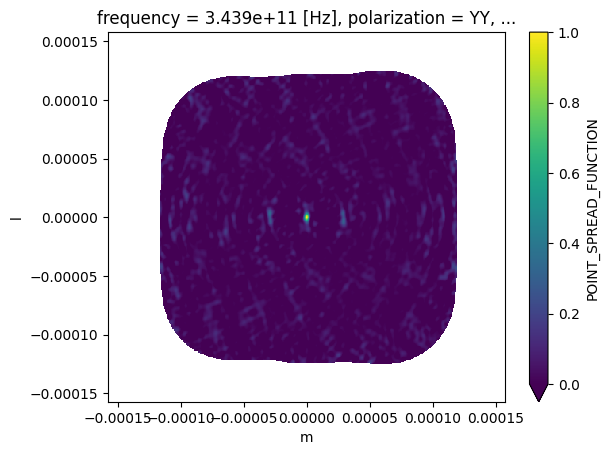

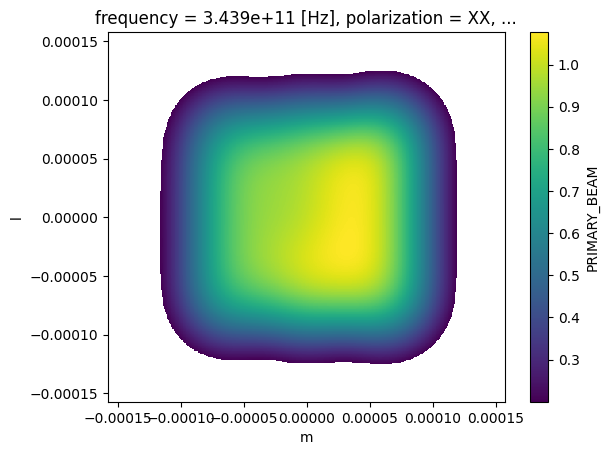

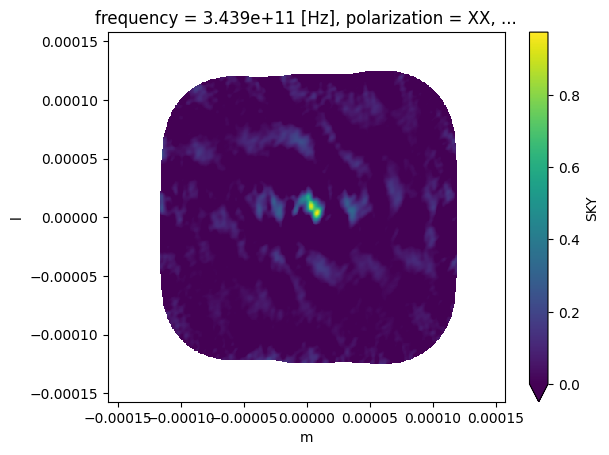

In [1]:
# show image
import xarray as xr

img_xds = xr.open_zarr("Antennae_North_Cube.img.zarr")
img_xds

import matplotlib.pyplot as plt

#%matplotlib widget
plt.figure()
img_xds.POINT_SPREAD_FUNCTION.isel(polarization=1, frequency=82).plot(cmap='viridis',vmin=0.0)
plt.figure()
img_xds.PRIMARY_BEAM.isel(polarization=0, frequency=82).plot()
plt.figure()
#img_xds.SKY.max(dim="frequency").isel(polarization=0).plot(cmap='viridis',vmin=0.0)
img_xds.SKY.isel(polarization=0,frequency=82).plot(cmap='viridis',vmin=0.0)

<Figure size 640x480 with 0 Axes>

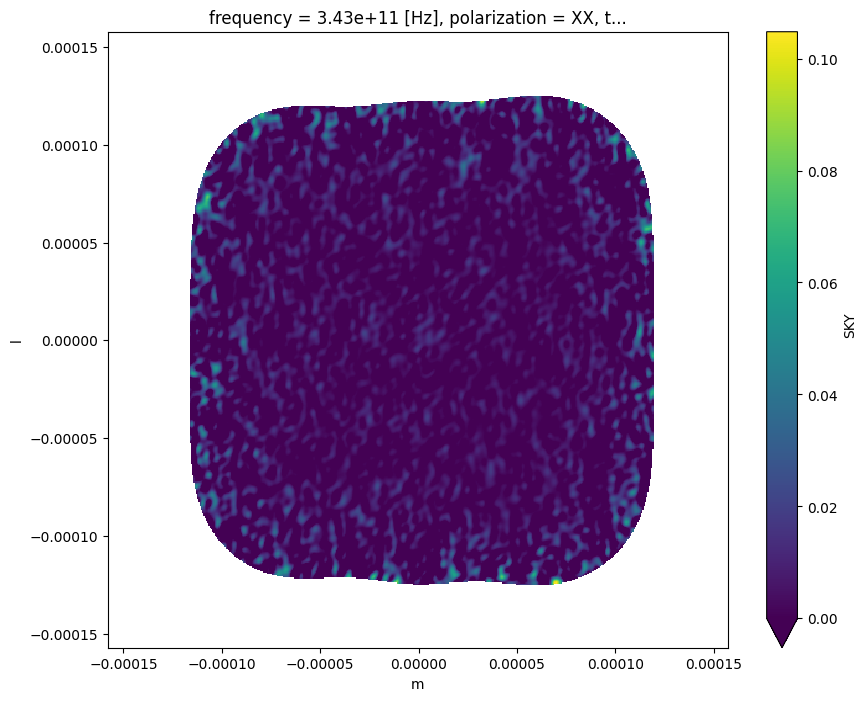

<Figure size 640x480 with 0 Axes>

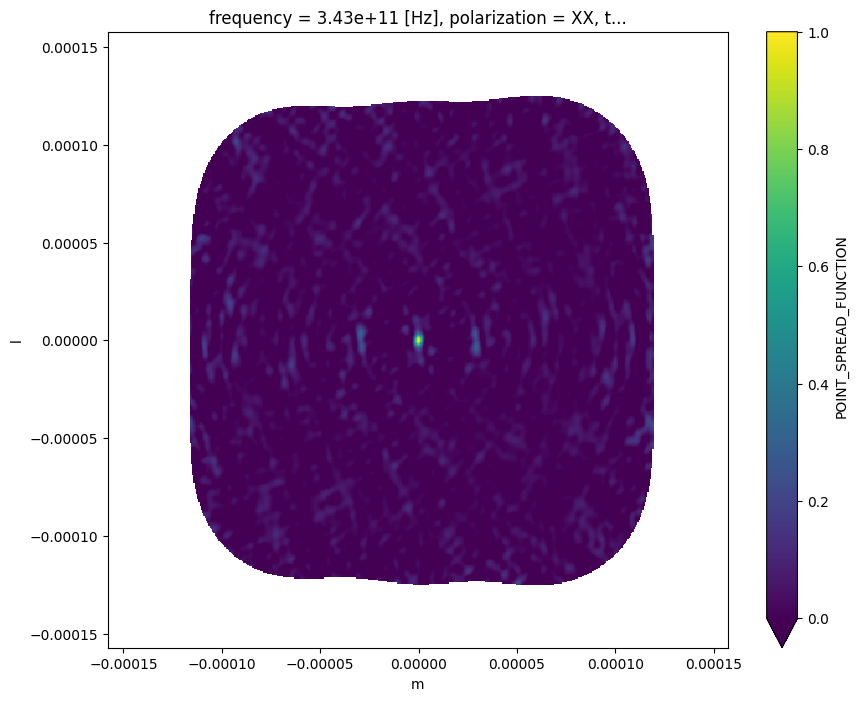

interactive(children=(IntSlider(value=2, description='freq_chan', max=165), Output()), _dom_classes=('widget-i…

<function __main__.plot_astroviper_vs_casa_weights_interactive(ms_xdt, freq_idx)>

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, fixed

def plot_astroviper_vs_casa_weights_interactive(ms_xdt, freq_idx):
    print()
    import matplotlib.pyplot as plt

    plt.figure()
    fig = plt.figure(figsize=(10, 8))
    img_xds.SKY.isel(polarization=0,frequency=freq_idx).plot(cmap='viridis',vmin=0.0)
    plt.show()
    plt.close(fig)   
    
    

    plt.figure()
    fig = plt.figure(figsize=(10, 8))
    img_xds.POINT_SPREAD_FUNCTION.real.isel(polarization=0,frequency=freq_idx).plot(cmap='viridis',vmin=0.0)
    plt.show()
    plt.close(fig)   

interact(
    plot_astroviper_vs_casa_weights_interactive,
    ms_xdt=fixed(img_xds),
    freq_idx=widgets.IntSlider(min=0, max=165, step=1, value=2, description="freq_chan"),
)